# Métricas de Rendimiento y Ajuste de Hiperparámetros
### ¿Qué aprenderemos hoy?
-   Validación Cruzada
-   Curva de Aprendizaje y Curva de Validación
-   Búsqueda de Hyperparámetros

## Pipeline de Scikit-Learn

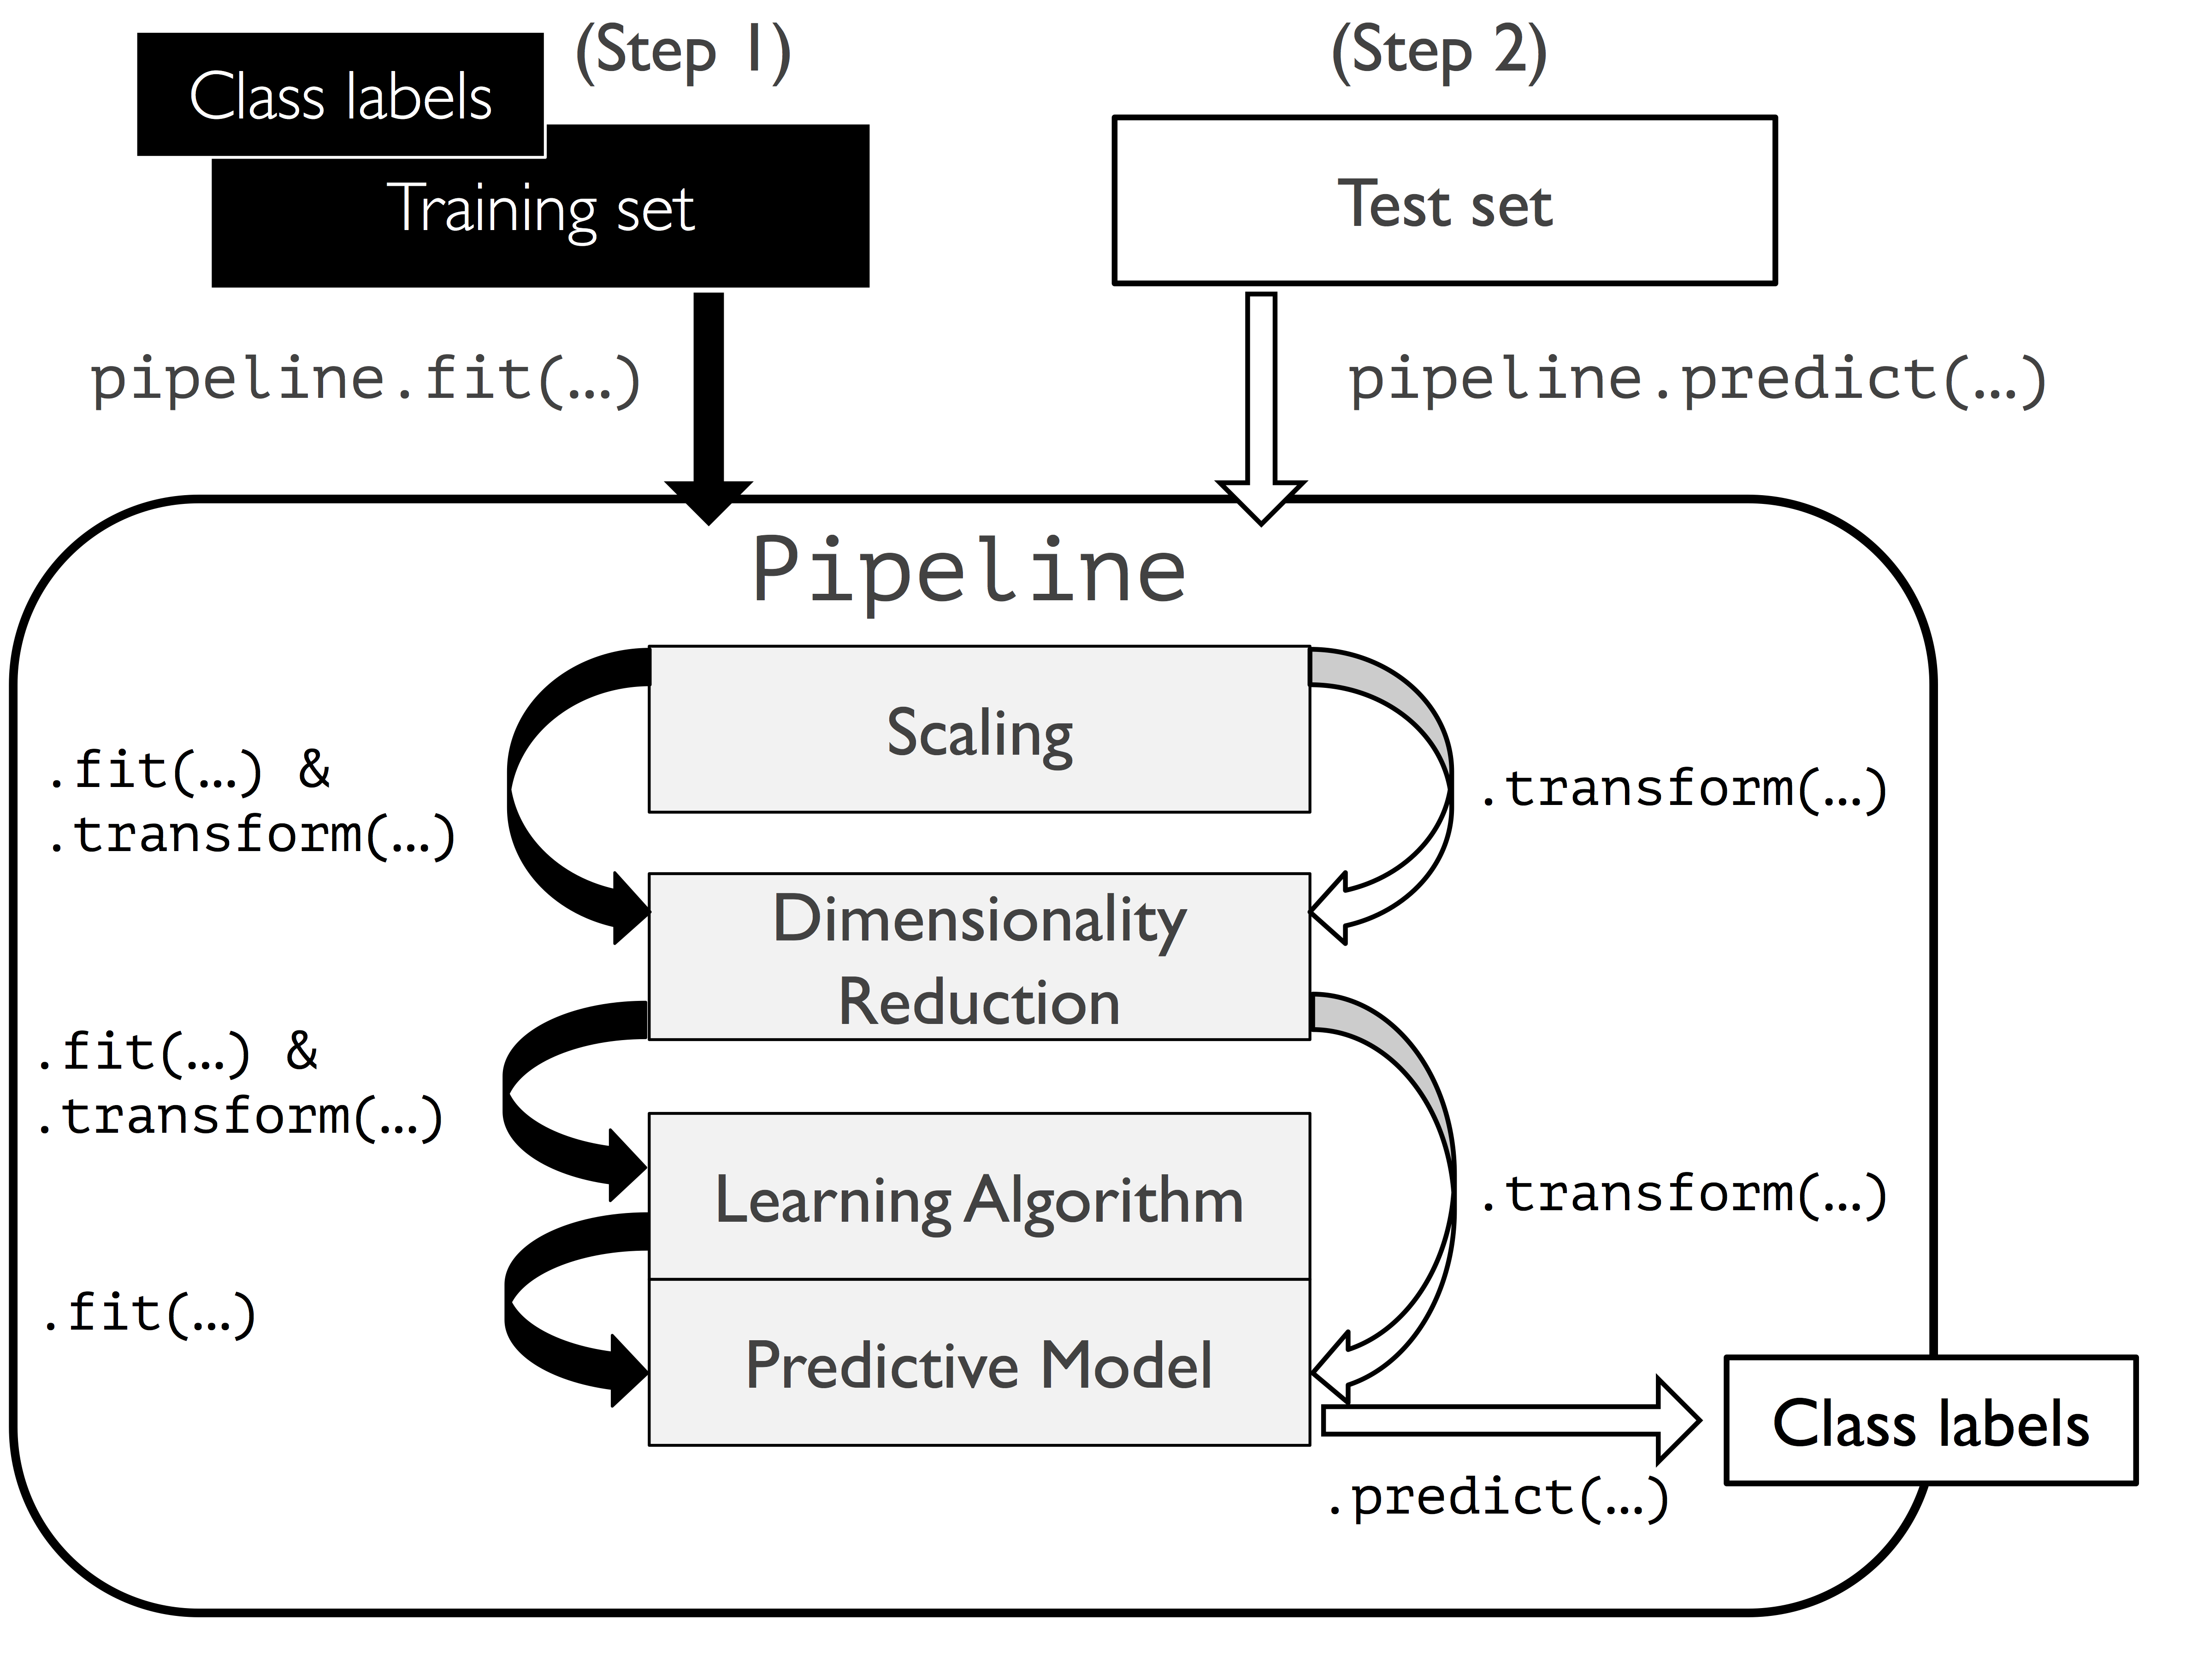

In [1]:
from IPython.display import Image
Image(filename=r'Imagenes_Clase_10/9_1.png', width=500)

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  
3  0.6638  0.17300  
4  0.2364  0.07678  

[5 rows x 32 columns]

In [3]:
df.shape

(569, 32)

In [4]:
df.iloc[:,1].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [5]:
df.iloc[:,1:].describe(include='all')

1           2           3           4            5           6   \
count   569  569.000000  569.000000  569.000000   569.000000  569.000000   
unique    2         NaN         NaN         NaN          NaN         NaN   
top       B         NaN         NaN         NaN          NaN         NaN   
freq    357         NaN         NaN         NaN          NaN         NaN   
mean    NaN   14.127292   19.289649   91.969033   654.889104    0.096360   
std     NaN    3.524049    4.301036   24.298981   351.914129    0.014064   
min     NaN    6.981000    9.710000   43.790000   143.500000    0.052630   
25%     NaN   11.700000   16.170000   75.170000   420.300000    0.086370   
50%     NaN   13.370000   18.840000   86.240000   551.100000    0.095870   
75%     NaN   15.780000   21.800000  104.100000   782.700000    0.105300   
max     NaN   28.110000   39.280000  188.500000  2501.000000    0.163400   

                7           8           9           10  ...          22  \
count   569.000000  569.000000  569.000000  569.000000  ...  569.000000   
unique         NaN         NaN         NaN         NaN  ...         NaN   
top            NaN         NaN         NaN         NaN  ...         NaN   
freq           NaN         NaN         NaN         NaN  ...         NaN   
mean      0.104341    0.088799    0.048919    0.181162  ...   16.269190   
std       0.052813    0.079720    0.038803    0.027414  ...    4.833242   
min       0.019380    0.000000    0.000000    0.106000  ...    7.930000   
25%       0.064920    0.029560    0.020310    0.161900  ...   13.010000   
50%       0.092630    0.061540    0.033500    0.179200  ...   14.970000   
75%       0.130400    0.130700    0.074000    0.195700  ...   18.790000   
max       0.345400    0.426800    0.201200    0.304000  ...   36.040000   

                23          24           25          26          27  \
count   569.000000  569.000000   569.000000  569.000000  569.000000   
unique         NaN         NaN          NaN         NaN         NaN   
top            NaN         NaN          NaN         NaN         NaN   
freq           NaN         NaN          NaN         NaN         NaN   
mean     25.677223  107.261213   880.583128    0.132369    0.254265   
std       6.146258   33.602542   569.356993    0.022832    0.157336   
min      12.020000   50.410000   185.200000    0.071170    0.027290   
25%      21.080000   84.110000   515.300000    0.116600    0.147200   
50%      25.410000   97.660000   686.500000    0.131300    0.211900   
75%      29.720000  125.400000  1084.000000    0.146000    0.339100   
max      49.540000  251.200000  4254.000000    0.222600    1.058000   

                28          29          30          31  
count   569.000000  569.000000  569.000000  569.000000  
unique         NaN         NaN         NaN         NaN  
top            NaN         NaN         NaN         NaN  
freq           NaN         NaN         NaN         NaN  
mean      0.272188    0.114606    0.290076    0.083946  
std       0.208624    0.065732    0.061867    0.018061  
min       0.000000    0.000000    0.156500    0.055040  
25%       0.114500    0.064930    0.250400    0.071460  
50%       0.226700    0.099930    0.282200    0.080040  
75%       0.382900    0.161400    0.317900    0.092080  
max       1.252000    0.291000    0.663800    0.207500  

[11 rows x 31 columns]

In [6]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

In [7]:
y[::10]

array(['M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B'], dtype=object)

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
y[::10]

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
le.classes_

array(['B', 'M'], dtype=object)

In [11]:
le.transform(['M','B'])

array([1, 0])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,
                                                    stratify=y,random_state=1)

In [13]:
print(len(X_train))
print(len(X_test))

455
114


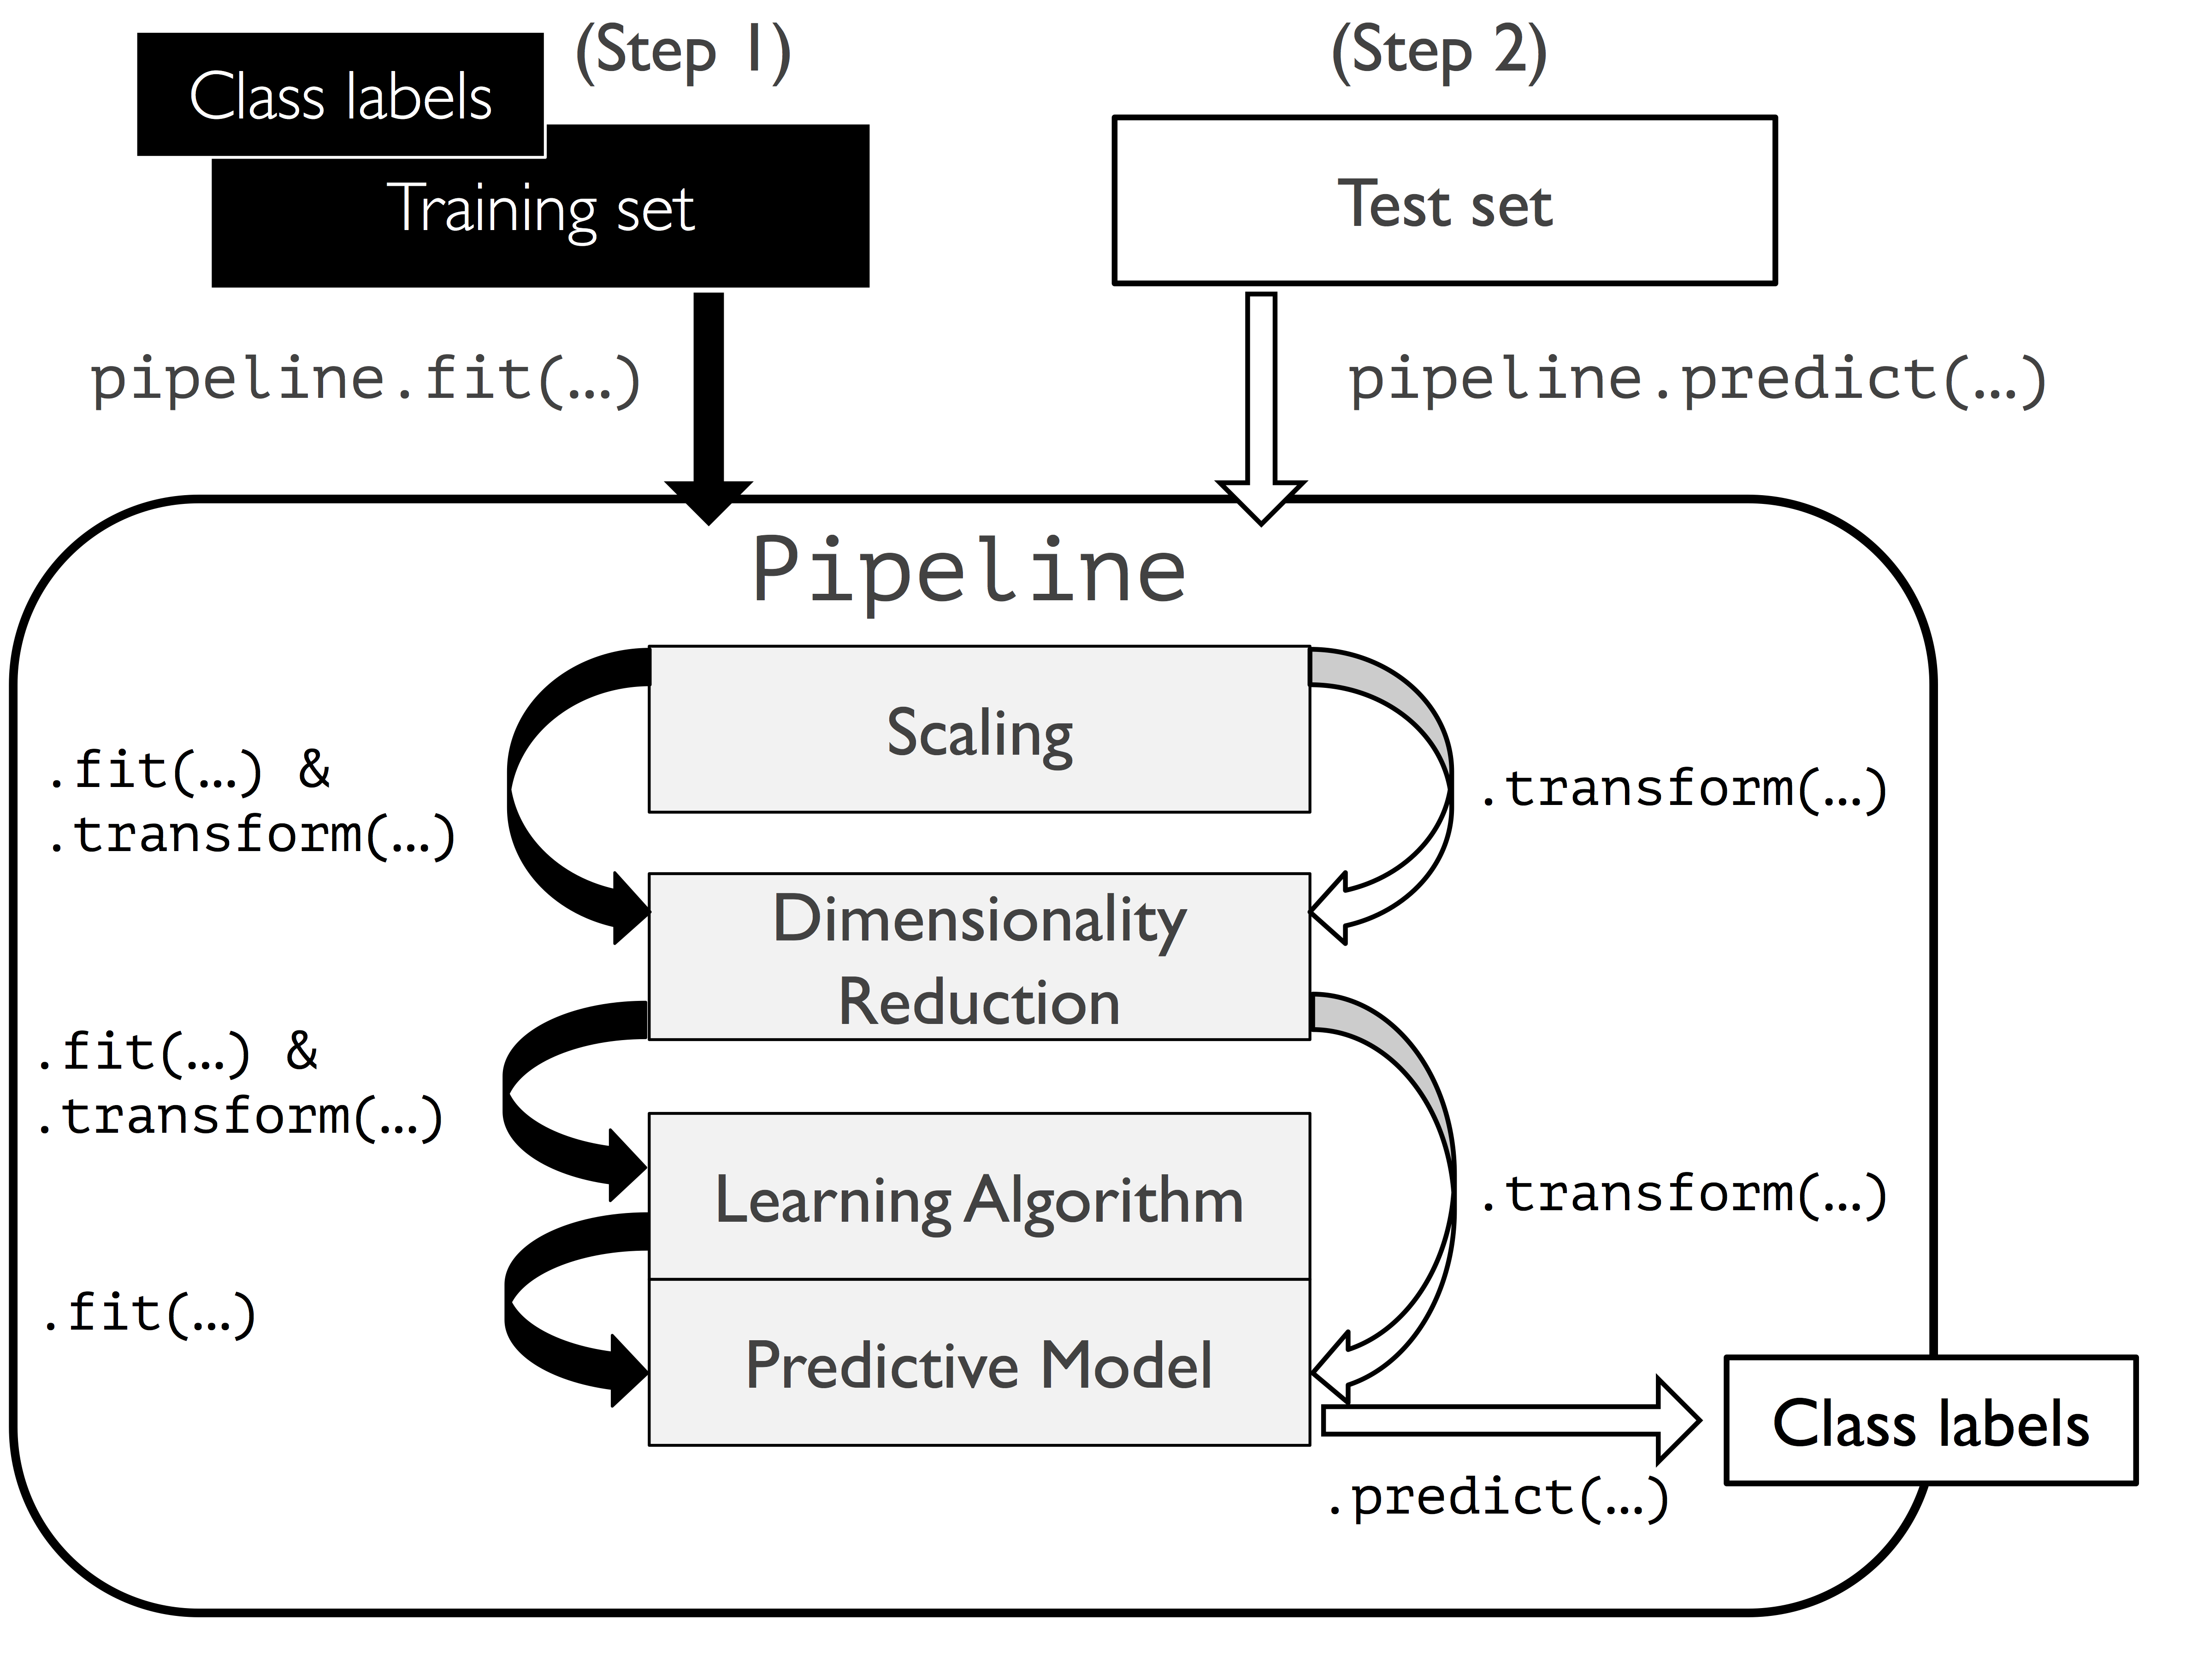

In [14]:
from IPython.display import Image
Image(filename=r'Imagenes_Clase_10/9_1.png', width=500)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=2),
                        LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


In [16]:
pipe_lr2 = make_pipeline(StandardScaler(),PCA(n_components=5),
                         LogisticRegression(random_state=1))
pipe_lr2.fit(X_train, y_train)
y_pred = pipe_lr2.predict(X_test)
print('Test Accuracy pipe_lr2: %.3f' % pipe_lr2.score(X_test, y_test))

Test Accuracy pipe_lr2: 0.974


- [Documentacion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)

## Cross Validation

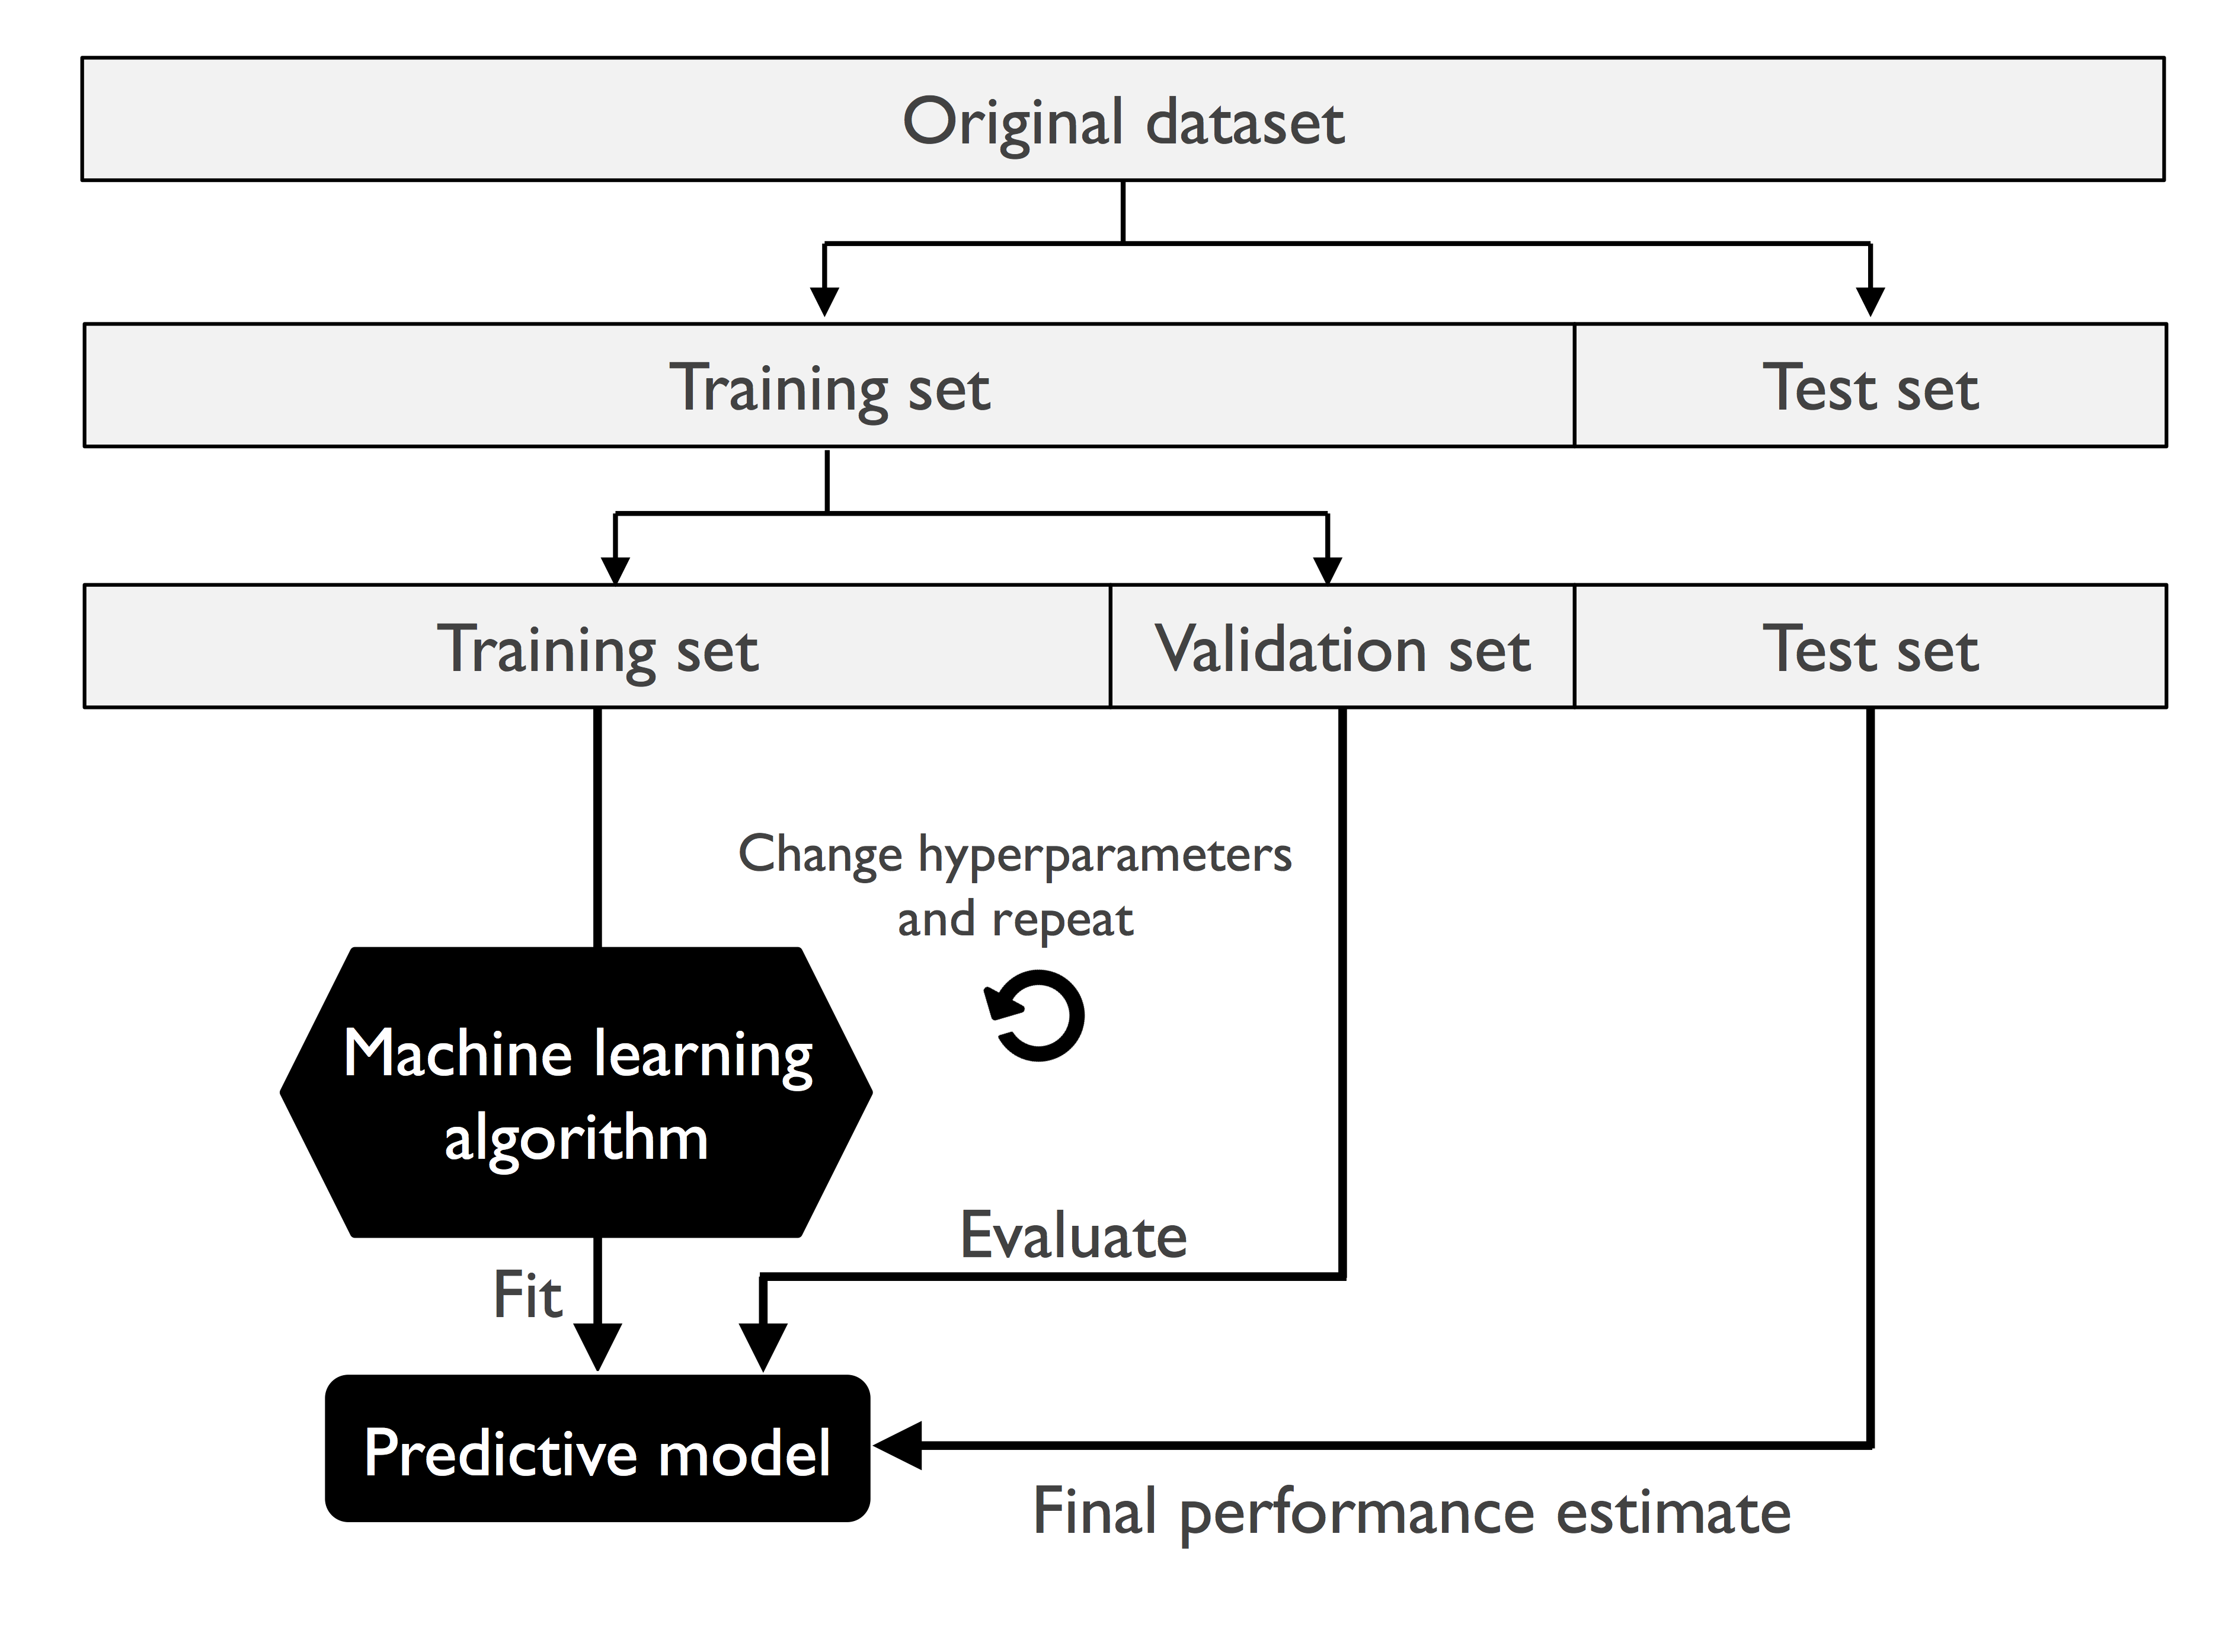

In [17]:
Image(filename=r'Imagenes_Clase_10/9_2.png', width=500)

### $K$-Fold Cross-Validation

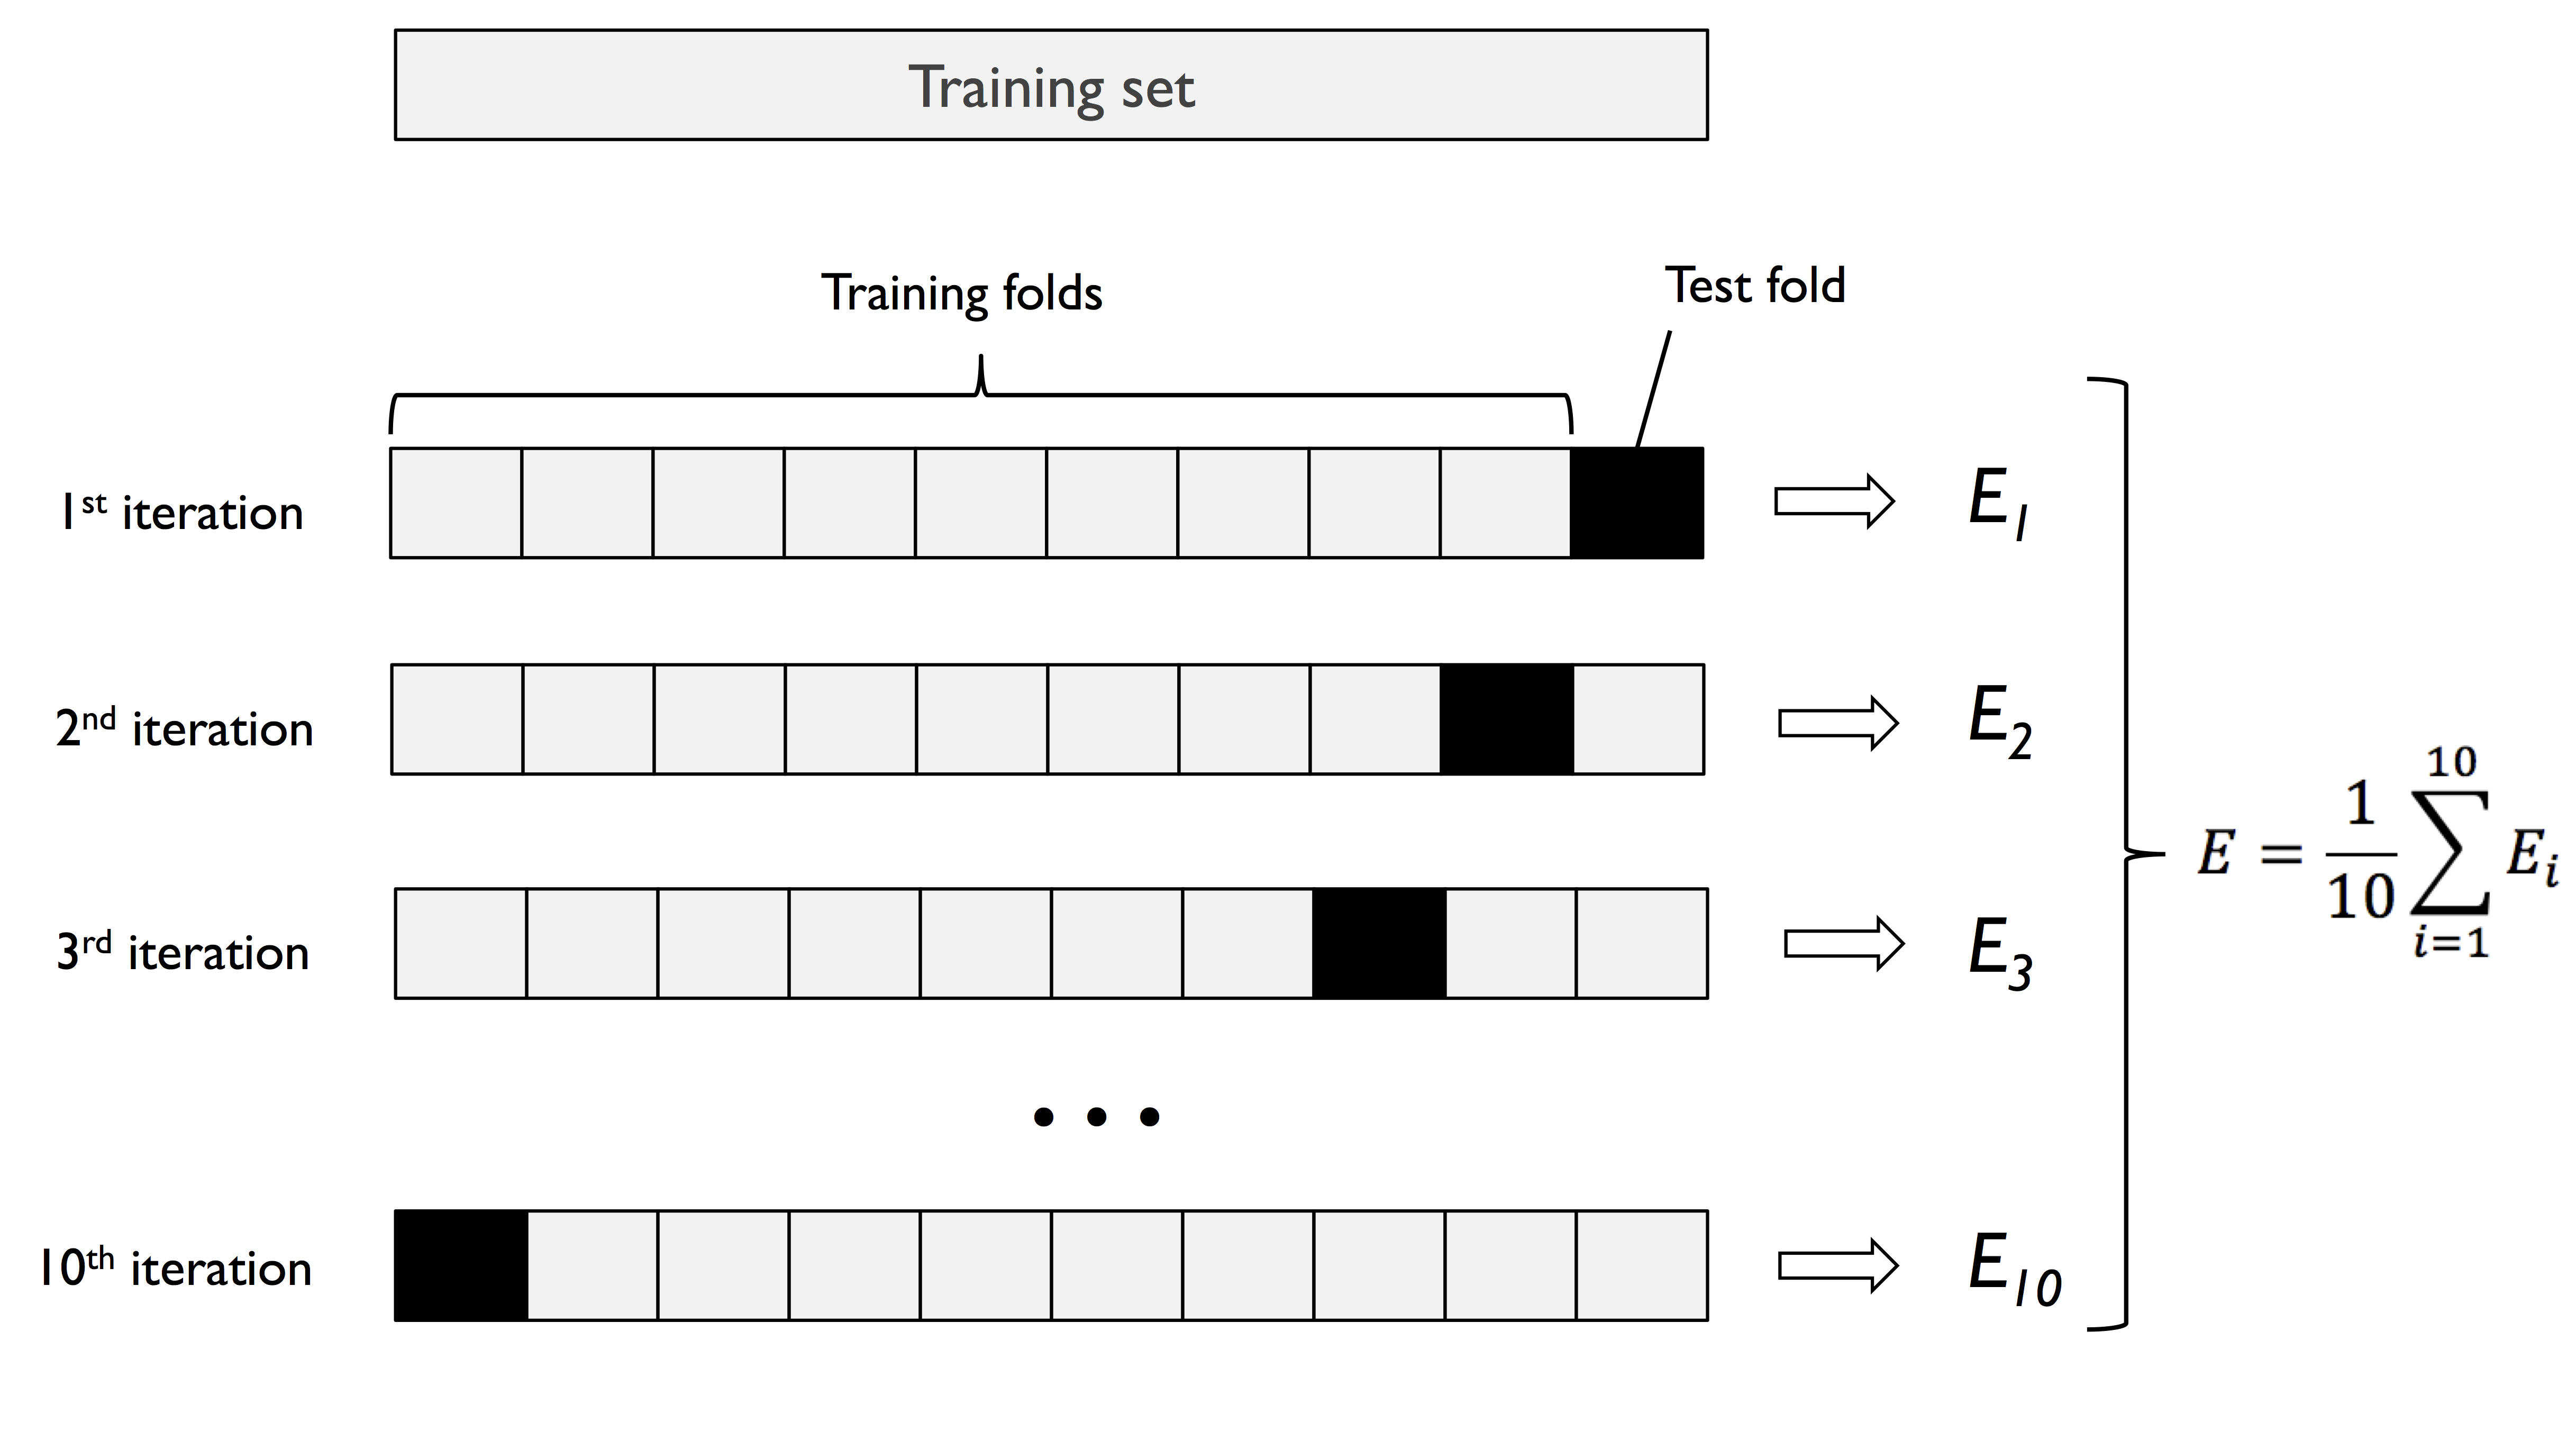

In [18]:
Image(filename=r'Imagenes_Clase_10/9_3.png', width=600)

In [19]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=2),
                            LogisticRegression(random_state=1))
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist train.: %s, Class dist test.: %s, Acc: %.3f' 
          % (k+1,np.bincount(y_train[train]),np.bincount(y_train[test]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist train.: [256 153], Class dist test.: [29 17], Acc: 0.935
Fold:  2, Class dist train.: [256 153], Class dist test.: [29 17], Acc: 0.935
Fold:  3, Class dist train.: [256 153], Class dist test.: [29 17], Acc: 0.957
Fold:  4, Class dist train.: [256 153], Class dist test.: [29 17], Acc: 0.957
Fold:  5, Class dist train.: [256 153], Class dist test.: [29 17], Acc: 0.935
Fold:  6, Class dist train.: [257 153], Class dist test.: [28 17], Acc: 0.956
Fold:  7, Class dist train.: [257 153], Class dist test.: [28 17], Acc: 0.978
Fold:  8, Class dist train.: [257 153], Class dist test.: [28 17], Acc: 0.933
Fold:  9, Class dist train.: [257 153], Class dist test.: [28 17], Acc: 0.956
Fold: 10, Class dist train.: [257 153], Class dist test.: [28 17], Acc: 0.956

CV accuracy: 0.950 +/- 0.014


- [Documentacion](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10,n_jobs=-1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


-   [Docuemntacion](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

**Observacion:** Siempre dejar de lado completamente hasta el final del proceso al conjunto Test.

## Overfitting y Underfitting

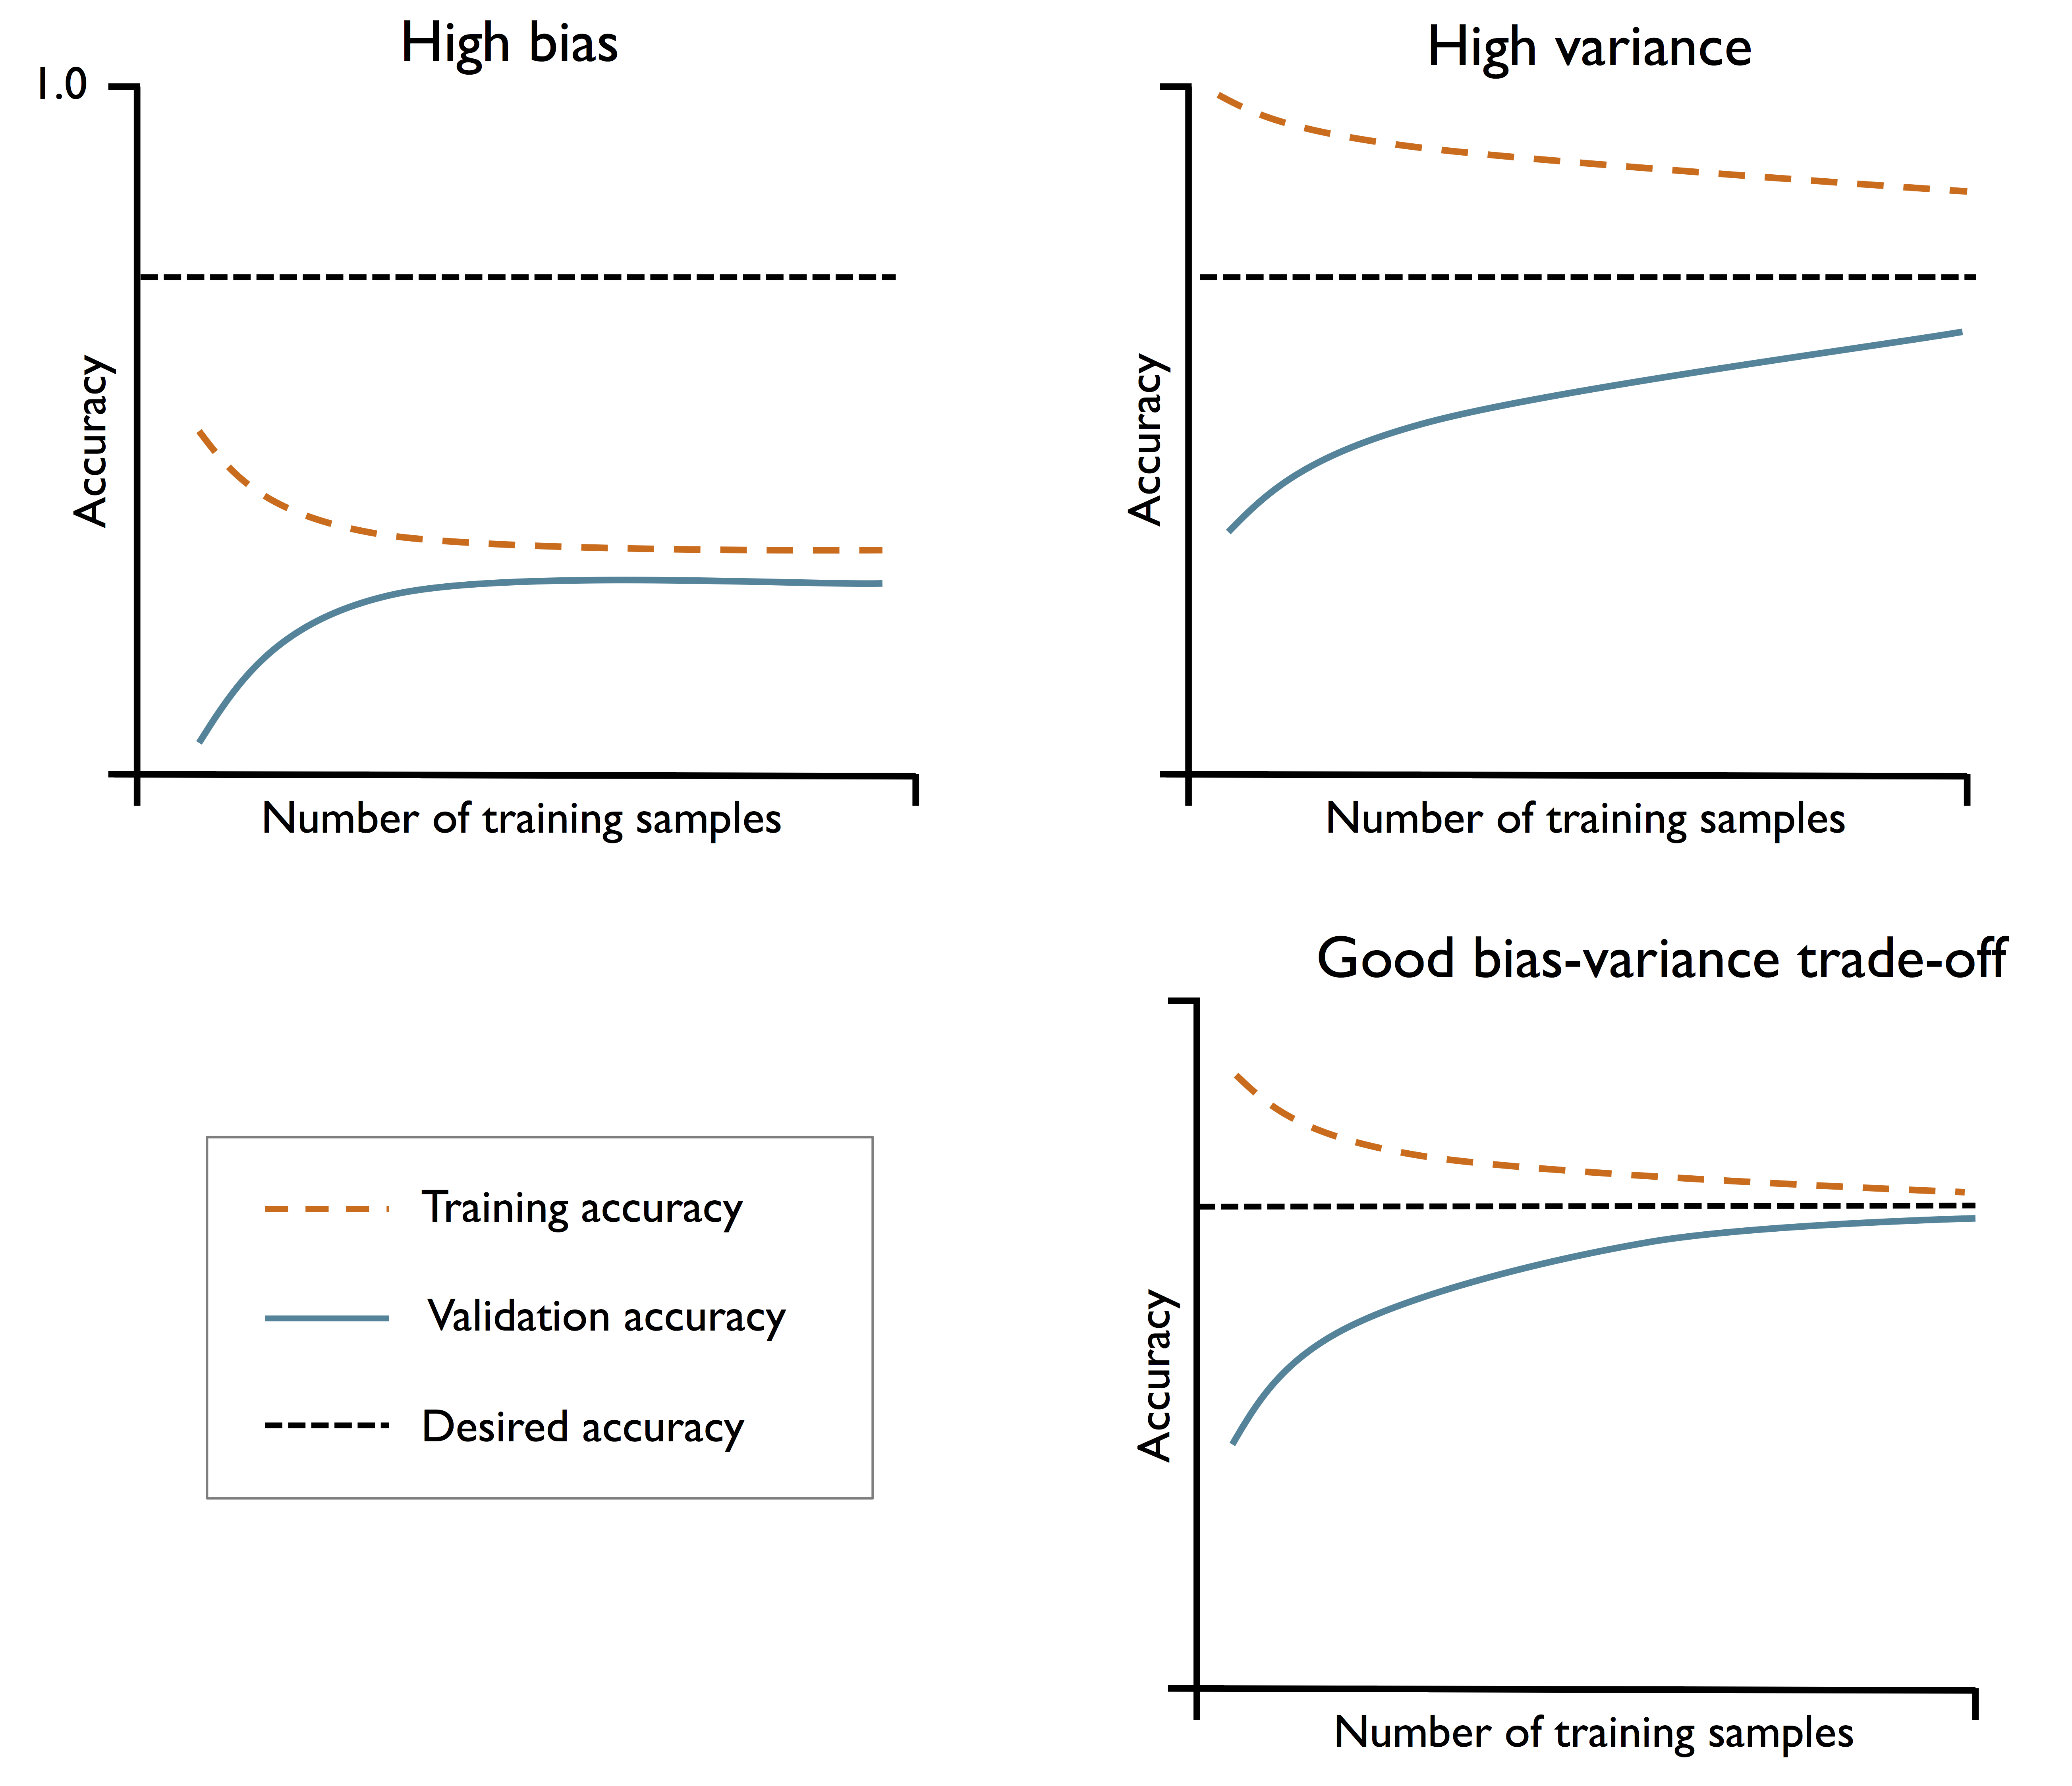

In [21]:
Image(filename=r'Imagenes_Clase_10/9_4.png', width=550)

## Curva de Aprendizaje

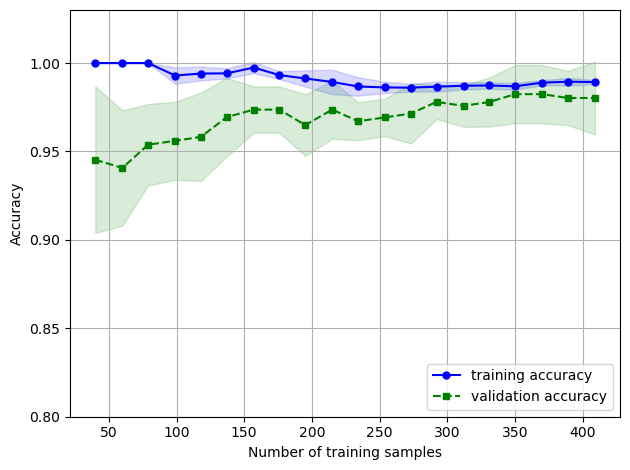

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',random_state=1))
train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr,X=X_train,y=y_train,
                                        train_sizes=np.linspace(0.1, 1.0, 20),cv=10,n_jobs=2)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',
         marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

## Curva de Validación

c:\ProgramData\anaconda3\envs\IMA539_2024_2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\envs\IMA539_2024_2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

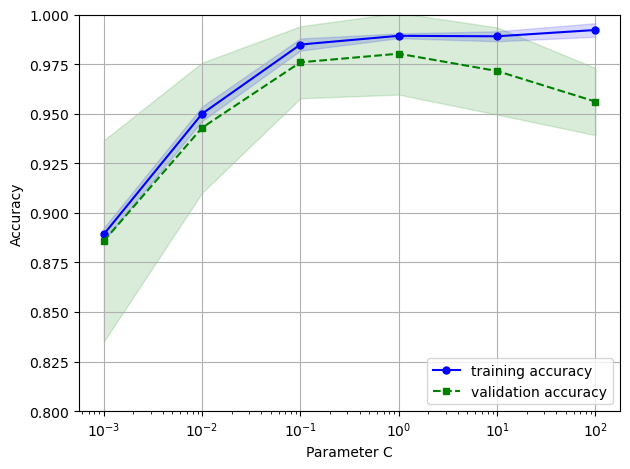

In [23]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr,X=X_train,y=y_train, 
                param_name='logisticregression__C',param_range=param_range,cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std,alpha=0.15,color='blue')
plt.plot(param_range,test_mean,color='green',linestyle='--', 
         marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15,color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

## Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001,0.01,1.,100.]
param_grid = [{'svc__C': param_range,'svc__kernel': ['linear']},
              {'svc__C': param_range,'svc__gamma': param_range,'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1,verbose=1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.9802197802197803
{'svc__C': 1.0, 'svc__kernel': 'linear'}


In [25]:
clf = gs.best_estimator_
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.965


### Combinando K-fold CV con Grid Search 

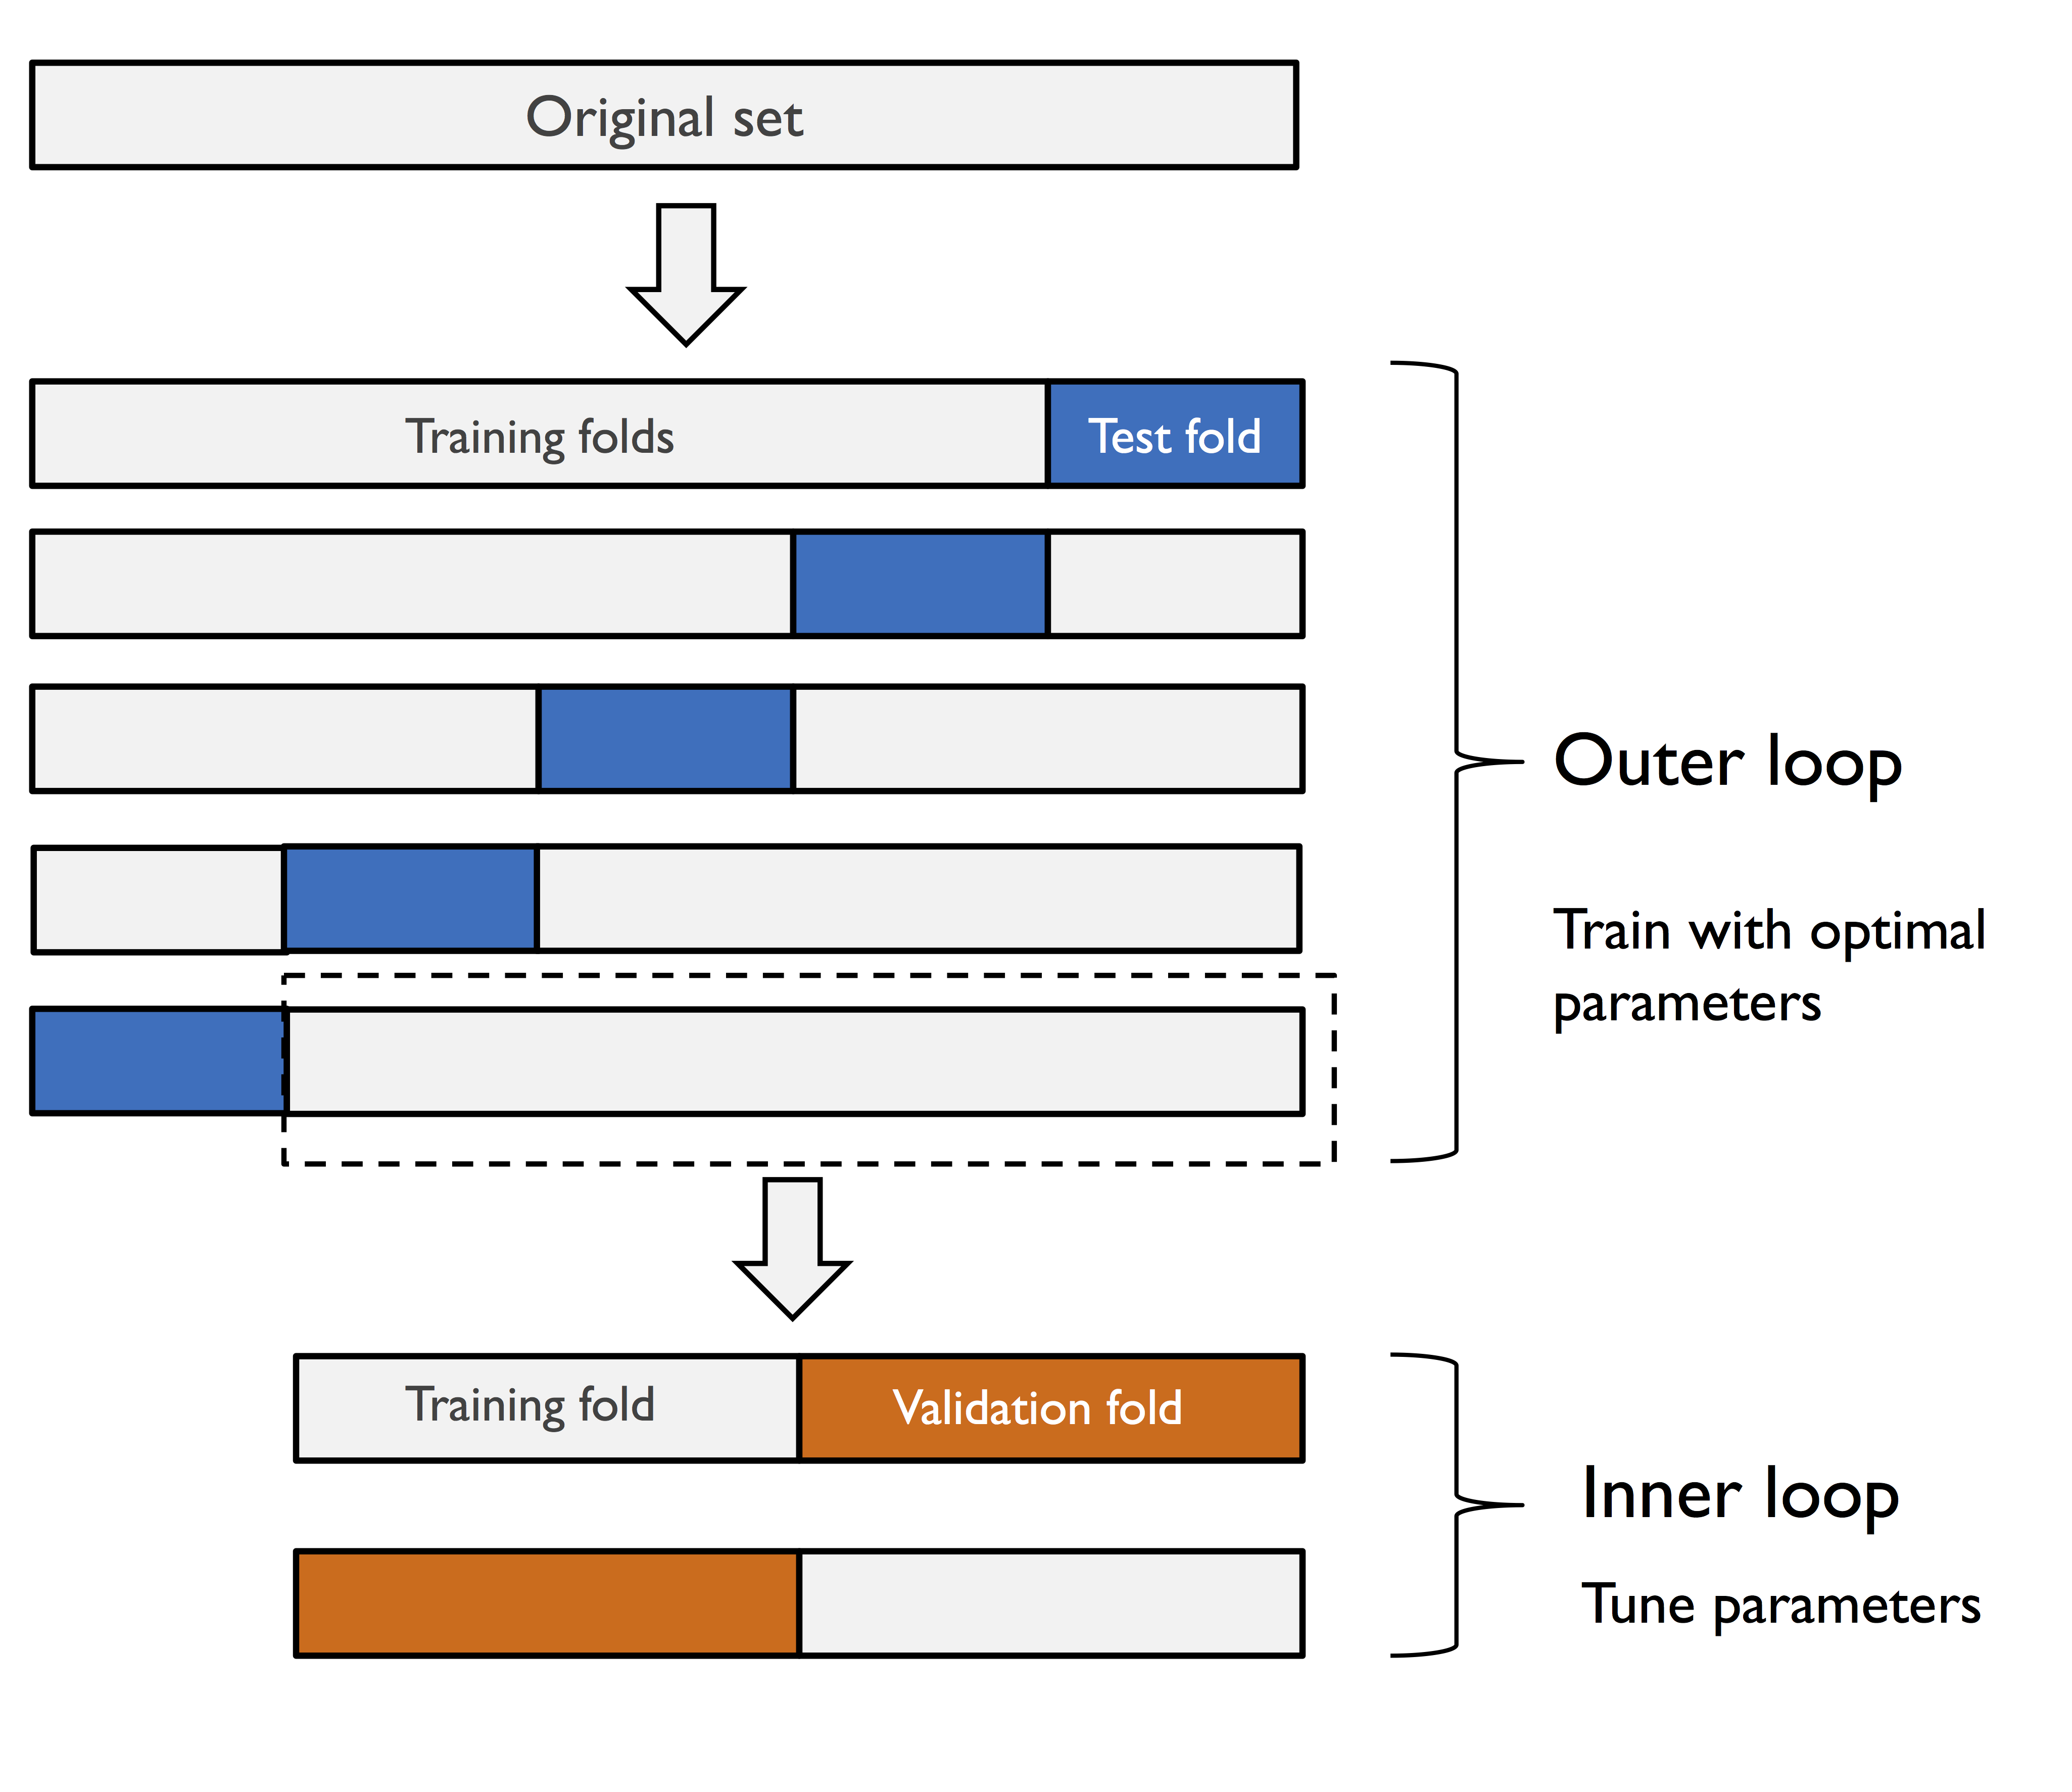

In [26]:

Image(filename=r'Imagenes_Clase_10/9_5.png', width=550)

In [27]:
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy',cv=10,n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.972 +/- 0.020


In [28]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [2, 4, 6, 8]}],
                  scoring='accuracy',cv=10)
scores = cross_val_score(gs, X_train, y_train,scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.958 +/- 0.023


### Búsqueda aleatoria de Hiperparámetros

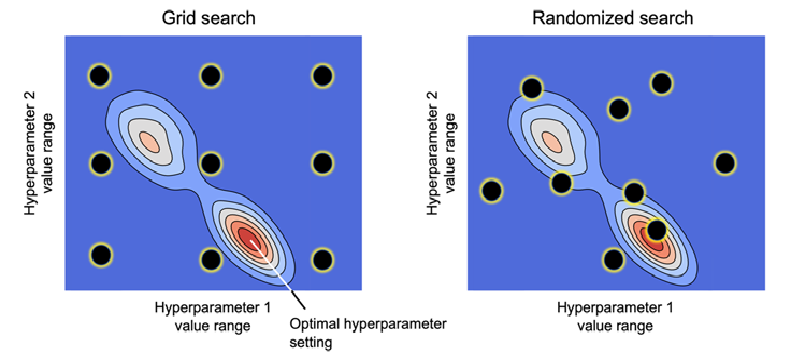

In [29]:
Image(filename=r'Imagenes_Clase_10/9_4_5.png', width=600)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
# PARAMETROS COMO LISTA
param_range = [0.0001,0.01,1.,100.]
param_grid = [{'svc__C': param_range,'svc__kernel': ['linear']},
              {'svc__C': param_range,'svc__gamma': param_range,'svc__kernel': ['rbf']}]
RSCV = RandomizedSearchCV(pipe_svc, param_grid, n_iter=5,random_state=0,verbose=1)
RSCV = RSCV.fit(X_train, y_train)
print(RSCV.best_score_)
print(RSCV.best_params_)
#search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9604395604395604
{'svc__kernel': 'linear', 'svc__C': 0.01}


In [31]:
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
# PARAMETROS COMO DISTRIBUCION
distribuciones = [{'svc__C': uniform(loc=1e-6, scale=100),'svc__kernel': ['linear']},
              {'svc__C': uniform(loc=1e-6, scale=100),'svc__gamma': uniform(loc=0, scale=10000),
               'svc__kernel': ['rbf']}]
RSCV = RandomizedSearchCV(pipe_svc, distribuciones, n_iter=5,random_state=1,verbose=1)
RSCV = RSCV.fit(X_train, y_train)
print(RSCV.best_score_)
print(RSCV.best_params_)
#search.best_params

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9494505494505494
{'svc__C': 39.658073729602606, 'svc__kernel': 'linear'}


**conda install scikit-optimize**

In [32]:
import skopt
print('skopt %s' % skopt.__version__)

skopt 0.10.2


In [33]:
from skopt import BayesSearchCV
parametros = dict()
parametros['svc__C'] = (1e-6, 100.0, 'uniform')
parametros['svc__gamma'] = (1e-6, 100.0, 'uniform')
parametros['svc__degree'] = (1,5)
parametros['svc__kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
#parametros['svc__kernel'] = ['linear', 'rbf']
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
search = BayesSearchCV(estimator=pipe_svc, search_spaces=parametros, n_jobs=-1, cv=5,n_iter=25,verbose=0)
# perform the search
search.fit(X, y)
# report the best result
print(search.best_score_)
print(search.best_params_)

c:\ProgramData\anaconda3\envs\IMA539_2024_2\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, 1, 100.0, 'linear'] before, using random point [79.3575659966628, 4, 95.56458612568865, 'sigmoid']
  warnings.warn(
c:\ProgramData\anaconda3\envs\IMA539_2024_2\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, 1, 100.0, 'linear'] before, using random point [74.53187471394622, 4, 76.17025457091108, 'sigmoid']
  warnings.warn(


0.9631578947368421
OrderedDict([('svc__C', 32.1676216181478), ('svc__degree', 4), ('svc__gamma', 62.57592291377845), ('svc__kernel', 'linear')])


**conda install -c conda-forge optuna**

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.metrics import accuracy_score
scaler=StandardScaler()
scaler=scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

c:\ProgramData\anaconda3\envs\IMA539_2024_2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
def model_performance(model, X=X_test_scaled, y=y_test):
    y_pred = model.predict(X)
    return round(accuracy_score(y_pred, y),5)
SVC_model=SVC(random_state=1)
SVC_model.fit(X_train_scaled, y_train)
print("Validation accuracy: ", model_performance(SVC_model))

Validation accuracy:  0.97368


In [36]:
def create_model(trial):
    model_type = trial.suggest_categorical('model_type', ['svc'])
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    regularization = trial.suggest_float('svm-regularization', 0.0001, 100)
    gamma = trial.suggest_float('gamma', 0.0001, 100)
    model = SVC(kernel=kernel, C=regularization,gamma=gamma,random_state=0)
    if trial.should_prune():
            raise optuna.TrialPruned()
    return model
def objective(trial):
    model = create_model(trial)
    model.fit(X_train_scaled, y_train)
    return model_performance(model)
study = optuna.create_study(direction='maximize')
study.optimize(objective , n_trials =25)

[I 2024-10-20 23:29:27,059] A new study created in memory with name: no-name-c57c70ed-7589-447e-864e-4187ecdc3b01
[I 2024-10-20 23:29:27,073] Trial 0 finished with value: 0.97368 and parameters: {'model_type': 'svc', 'kernel': 'linear', 'svm-regularization': 24.31162576996445, 'gamma': 17.206536705400058}. Best is trial 0 with value: 0.97368.
[I 2024-10-20 23:29:27,097] Trial 1 finished with value: 0.63158 and parameters: {'model_type': 'svc', 'kernel': 'rbf', 'svm-regularization': 87.31859318965574, 'gamma': 74.7806415675585}. Best is trial 0 with value: 0.97368.
[I 2024-10-20 23:29:27,117] Trial 2 finished with value: 0.98246 and parameters: {'model_type': 'svc', 'kernel': 'linear', 'svm-regularization': 60.866877495388465, 'gamma': 65.10858309237044}. Best is trial 2 with value: 0.98246.
[I 2024-10-20 23:29:27,139] Trial 3 finished with value: 0.63158 and parameters: {'model_type': 'svc', 'kernel': 'rbf', 'svm-regularization': 48.38303022683252, 'gamma': 81.88967277688357}. Best is 